## Урок 10. Домашнее задание

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

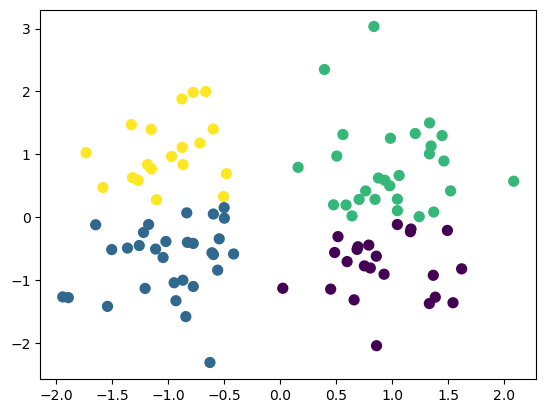

In [11]:
# -- ВАШ КОД ТУТ --
import pickle
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

# данные получены с помощью функции make_classification
with open('7.10._clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

model = KMeans(n_clusters=4, n_init=10).fit(X)

plt.scatter(X[:,0],X[:,1], c=model.labels_, s=50)
plt.show()

In [12]:
score = silhouette_score(X, model.labels_)
score

0.4433754926522356


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [13]:
# -- ВАШ КОД ТУТ --
from sklearn.metrics import adjusted_mutual_info_score

score2 = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

score2

0.5835423055834893


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

best cluster num: 3


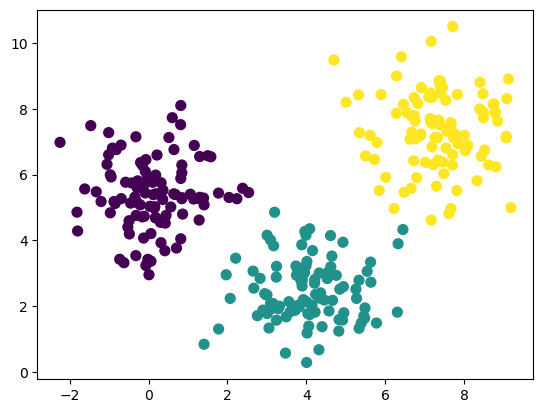

In [45]:
# -- ВАШ КОД ТУТ --
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

# данные получены с помощью функции make_classification

data = pd.read_csv('7.10_clustering_hw.csv')


X_1 = data['x1']
X_2 = data['x2']
X_ = data[['x1','x2']]
x = np.array(X_)
Y = data['y']


metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS+1):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99, n_init=10).fit(x)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            x[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    # print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

# plt.plot([i+1 for i in range(len(metrics))], metrics)
# plt.show()

model = KMeans(n_clusters=3, n_init=10).fit(x)

plt.scatter(X_1,X_2, s=50, c=model.labels_)
plt.show()


In [47]:
n1 = model.predict([[5,8]])
n2 = model.predict([[0,5]])
print(f'Первая ячейка {n1}\nВторая ячейка {n2}')

Первая ячейка [2]
Вторая ячейка [0]


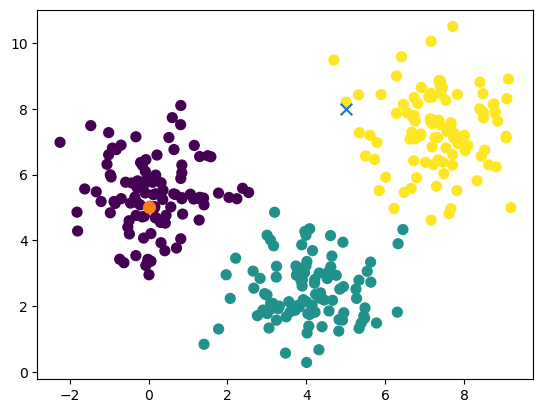

In [49]:
plt.scatter(X_1,X_2, s=50, c=model.labels_)
plt.scatter(5,8, marker='x', s=70)
plt.scatter(0,5, marker='o', s=70)
plt.show()


In [50]:
from sklearn.metrics import adjusted_mutual_info_score

scoreAMI = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
scoreAMI

0.9700074953683859

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)